# Machine Learning-Based Analysis of Gene Expression Profiles in Breast Cancer


**Original Educational Template**(Provided by course instructors)      
**Mohamed Hussein** (Code restructuring, enhanced clarity, detailed annotations, and GitHub publication)    
**Date:**2025-09-17


## Notebook 3 – Feature Selection
This notebook performs *feature selection* on the normalized breast cancer gene expression dataset.
The goal is to identify the top 50 informative genes using *Mutual Information*, visualize their scores, and save the selected features for downstream modeling.


## Workflow Overview:

1. Import required libraries
2. Load preprocessed normalized dataset
3. Split data into training and testing sets
4. Apply feature selection using Mutual Information
5. Visualize feature importance scores
6. Export selected features and datasets for downstream model building

# 3.0 Import Required Libraries

In [6]:
import pandas as pd                               # Data manipulation and handling
import numpy as np                                # Numerical operations
from sklearn.feature_selection import SelectKBest, mutual_info_classif  # Feature selection methods
import matplotlib.pyplot as plt                   # Visualization
import seaborn as sns                             # Statistical plotting
from sklearn.model_selection import train_test_split  # Data splitting
import pickle                                     # Save serialized Python objects


# 3.1 Load Preprocessed Data

In [8]:
X_normalized_df = pd.read_csv('data_normalized_minmax.csv')     # Load normalized dataset from Notebook 2

X = X_normalized_df.drop(columns=['Label'])                     # Features only (all gene expression values)
y = X_normalized_df['Label']                                    # Class labels (Normal / Cancer)

# Split dataset into training and test sets (70/30 split)
X_train_df, X_test_df, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Training set shape:", X_train_df.shape)                  # Display train set shape
print("Test set shape:", X_test_df.shape)                       # Display test set shape



Training set shape: (40, 15618)
Test set shape: (18, 15618)


# 3.2 Feature Selection Using Mutual Information

In [10]:
selector = SelectKBest(score_func=mutual_info_classif, k=50)    # Initialize selector with top 50 features

X_train_selected = selector.fit_transform(X_train_df, y_train)  # Fit selector on training data only
X_test_selected = selector.transform(X_test_df)                 # Apply same transformation to test data

selected_gene_names = X_train_df.columns[selector.get_support()] # Extract names of selected genes

print("Top 5 selected genes:", selected_gene_names[:5].tolist()) # Display top 5 genes
print("Top selected genes:", selected_gene_names.tolist())       # List all selected genes
print("X_train_selected shape:", X_train_selected.shape)         # Confirm training shape after selection
print("X_test_selected shape:", X_test_selected.shape)           # Confirm test shape after selection



Top 5 selected genes: ['CD300LG', 'ANLN', 'CRTAP', 'MOCS1', 'PTCH1']
Top selected genes: ['CD300LG', 'ANLN', 'CRTAP', 'MOCS1', 'PTCH1', 'CDKN3', 'SQLE', 'MIR99AHG', 'PLEKHM3', 'FAM13A', 'DPYSL2', 'TOP2A', 'RRM2', 'PCLAF', 'CDK1', 'DMD', 'SPRY2', 'ZWINT', 'AURKA', 'CKS2', 'NEK2', 'HLF', 'NMT2', 'COL10A1', 'GNAL', 'THRB', 'CENPF', 'GABARAPL1', 'GPC3', 'TPX2', 'GPR68', 'FANCI', 'OLFML2A', 'CCNB1', 'PRC1', 'NUSAP1', 'PLSCR4', 'JAM2', 'ASPM', 'NIPSNAP3B', 'SH3BGRL2', 'CACHD1', 'UHRF1', 'FAM83D', 'STARD9', 'FAM162B', 'MIR497HG', 'SCN4B', 'GPIHBP1', 'MICU3']
X_train_selected shape: (40, 50)
X_test_selected shape: (18, 50)


# 3.3 Visualize Feature Scores

Number of feature scores: 15618


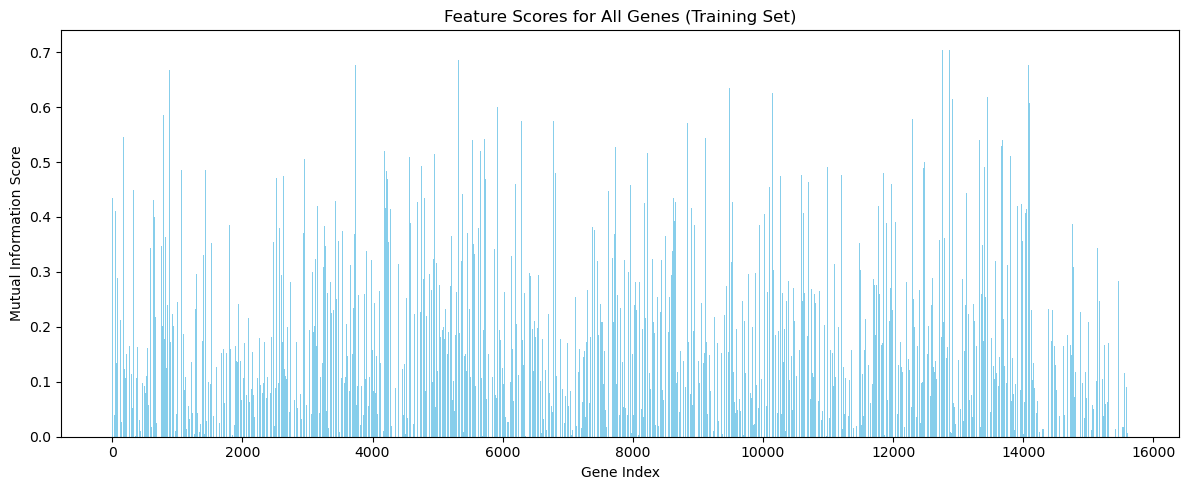

In [12]:
scores = selector.scores_                                       # Retrieve feature importance scores
print("Number of feature scores:", len(scores))
plt.figure(figsize=(12,5))
plt.bar(range(len(scores)), scores, color='skyblue')            # Bar plot of feature scores
plt.xlabel('Gene Index')
plt.ylabel('Mutual Information Score')
plt.title('Feature Scores for All Genes (Training Set)')
plt.tight_layout()
plt.savefig('feature_scores_barplot.png', dpi=300)              # Save plot as PNG
plt.show()


# 3.4 Export Top 50 Selected Genes

In [14]:
feature_summary = pd.DataFrame({
    'Gene': selected_gene_names,
    'Score': scores[selector.get_support()]
}).sort_values(by='Score', ascending=False)                      # Sort genes by MI score

feature_summary.to_csv('selected_genes_top50.csv', index=False)  # Save selected genes as CSV



# 3.5 Export Train/Test Feature Sets and Labels

In [16]:
with open('X_train_selected.pkl', 'wb') as f: pickle.dump(X_train_selected, f)    # Save X_train_selected
with open('X_test_selected.pkl', 'wb') as f: pickle.dump(X_test_selected, f)      # Save X_test_selected
with open('y_train.pkl', 'wb') as f: pickle.dump(y_train, f)                      # Save y_train
with open('y_test.pkl', 'wb') as f: pickle.dump(y_test, f)                        # Save y_test
with open('selected_gene_names.pkl', 'wb') as f: pickle.dump(selected_gene_names.tolist(), f) # Save gene names

print("\nFeature selection completed successfully.")             # Confirmation message
print("Top 50 genes saved as 'selected_genes_top50.csv'")         # Save summary
print("Train/test sets and selected genes saved for model building.") 


Feature selection completed successfully.
Top 50 genes saved as 'selected_genes_top50.csv'
Train/test sets and selected genes saved for model building.


**Next Step:** Notebook 4 will focus on **Model Building and Evaluation**.

### Export Notebook 3 to HTML

In [1]:
!jupyter nbconvert --to html --embed-images "Notebook_3_Feature_Selection.ipynb" --output "Notebook_3_Feature_Selection.html

[NbConvertApp] Converting notebook Notebook_3_Feature_Selection.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 331189 bytes to Notebook_3_Feature_Selection.html
